<a href="https://colab.research.google.com/github/GilSasson/ai/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import math 
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Activation, Flatten, LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit, train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [ ]:
#getting the dataset
#url = 'https://raw.githubusercontent.com/GilSasson/ai/main/Apple.csv'
url = 'https://raw.githubusercontent.com/GilSasson/ai/main/Facebook.csv'
df=pd.read_csv(url,  header=0, error_bad_lines=False) 
#put dta in dataset without header line
rawdataset = np.array(df)

In [ ]:
#dropping null values if such exists from np and df, remove # for Apple.csv dataset
print("shape off dataframe before drop:",df.shape)
print("shape of np before drop:",rawdataset.shape)
null_row = np.where(df['Low'].isnull()) 
#dataset = np.delete(rawdataset,(null_row[0][0]), axis=0)
#print("shape of np after drop:",dataset.shape)
#df.drop(null_row[0][0], axis=0, inplace = True)
#print("shape of dataframe after drop:",df.shape)


shape off dataframe before drop: (2076, 7)
shape of np before drop: (2076, 7)


In [ ]:
#choosing the target
y = pd.DataFrame(df['Adj Close'])
#choosing the features
x = ['Volume', 'High']

In [ ]:
#scaling the stock values in order to reduce memory usage
scaler = MinMaxScaler()
x_transform = scaler.fit_transform(df[x])
x_transform = pd.DataFrame(columns=x, data=x_transform, index=df.index)
x_transform.tail() #testing the scaling

,Volume,High
2071,0.027332,0.942483
2072,0.020190,0.947318
2073,0.015642,0.937687
2074,0.013103,0.943251
2075,0.022486,0.947279


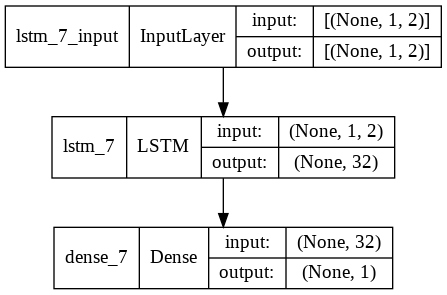

In [ ]:
#train and test splitting
timesplit = TimeSeriesSplit(n_splits=2)
for train_index, test_index in timesplit.split(x_transform):
        x_train, x_test = x_transform[:len(train_index)], x_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
#lstm model
trainx = np.array(x_train)
testx = np.array(x_test)
x_train = trainx.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = testx.reshape(x_test.shape[0], 1, x_test.shape[1])
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainx.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss = 'mean_squared_error', optimizer='Adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1, shuffle=False)

Epoch 1/100
139/139 [==============================] - 2s 3ms/step - loss: 8892.5771
Epoch 2/100
139/139 [==============================] - 0s 2ms/step - loss: 8703.0352
Epoch 3/100
139/139 [==============================] - 0s 2ms/step - loss: 8334.5596
Epoch 4/100
139/139 [==============================] - 0s 2ms/step - loss: 7731.2954
Epoch 5/100
139/139 [==============================] - 0s 2ms/step - loss: 6905.1313
Epoch 6/100
139/139 [==============================] - 0s 2ms/step - loss: 5930.4199
Epoch 7/100
139/139 [==============================] - 0s 2ms/step - loss: 4912.7314
Epoch 8/100
139/139 [==============================] - 0s 2ms/step - loss: 3952.7207
Epoch 9/100
139/139 [==============================] - 0s 2ms/step - loss: 3122.5730
Epoch 10/100
139/139 [==============================] - 0s 2ms/step - loss: 2458.0388
Epoch 11/100
139/139 [==============================] - 0s 2ms/step - loss: 1961.9019
Epoch 12/100
139/139 [==============================] - 0s 2ms/

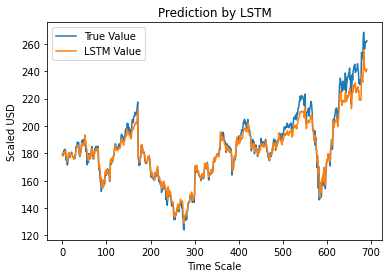

In [ ]:
y_pred = lstm.predict(x_test)
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
